### One specific scenario

In [ ]:
from scripts.visualizations import StatePlotter
from scripts.utils import load_scenario_data
import os
from src.environment import AircraftDisruptionEnv

env_type = 'myopic'

# Set the scenario and root folder
data_root_folder = "../data/Testing/1k-3ac-12f-1dis-F/"
scenario_name = 'Scenario_01'

# Verify that the scenario exists
if not os.path.exists(data_root_folder + scenario_name):
    raise FileNotFoundError('The scenario does not exist at ', data_root_folder + scenario_name)

# Run the visualization for the scenario
data_dict = load_scenario_data(data_root_folder)

# Extract necessary data for the environment
aircraft_dict = data_dict['aircraft']
flights_dict = data_dict['flights']
rotations_dict = data_dict['rotations']
alt_aircraft_dict = data_dict['alt_aircraft']
config_dict = data_dict['config']

# Initialize the environment
env = AircraftDisruptionEnv(aircraft_dict, flights_dict, rotations_dict, alt_aircraft_dict, config_dict,  env_type=env_type)


# Create StatePlotter object for visualizing the environment state
state_plotter = StatePlotter(
    aircraft_dict=env.aircraft_dict,
    flights_dict=env.flights_dict,
    rotations_dict=env.rotations_dict,
    alt_aircraft_dict=env.alt_aircraft_dict,
    start_datetime=env.start_datetime,
    end_datetime=env.end_datetime,
    uncertain_breakdowns=env.uncertain_breakdowns,
)
#  def plot_state(self, flights_dict, swapped_flights, environment_delayed_flights, cancelled_flights, current_datetime):
# Create the plotter object
StatePlotter.plot_state(flights_dict, 0, aircraft_dict, rotations_dict, alt_aircraft_dict, config_dict)



File not found: ../data/Testing/1k-3ac-12f-1dis-F/aircraft.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/airports.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/alt_aircraft.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/alt_airports.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/alt_flights.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/config.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/dist.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/flights.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/itineraries.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/position.csv
File not found: ../data/Testing/1k-3ac-12f-1dis-F/rotations.csv


TypeError: 'NoneType' object is not subscriptable

### A whole folder (like the training set)

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_01


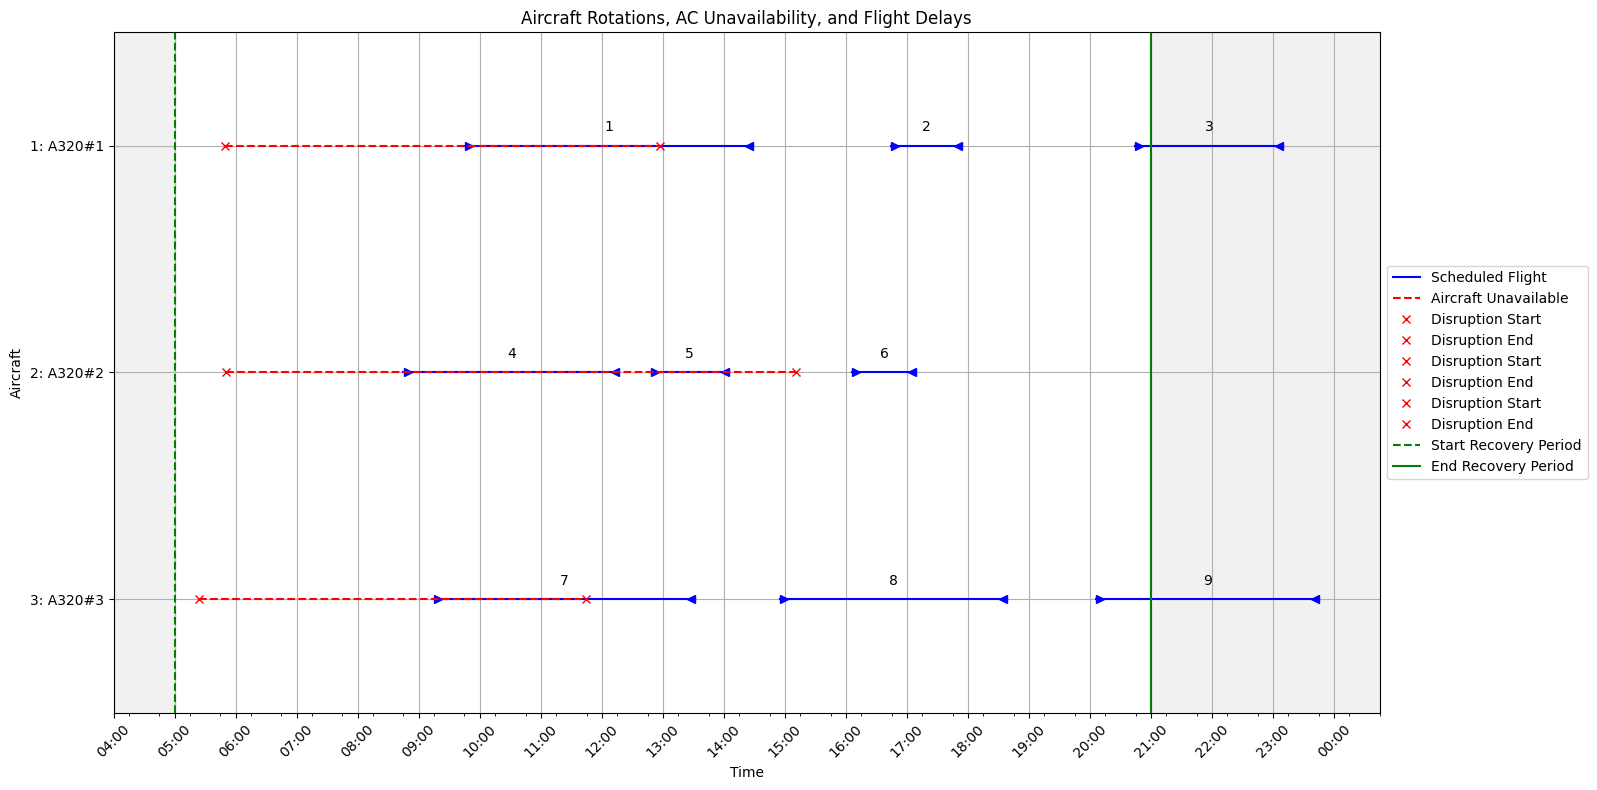

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_02


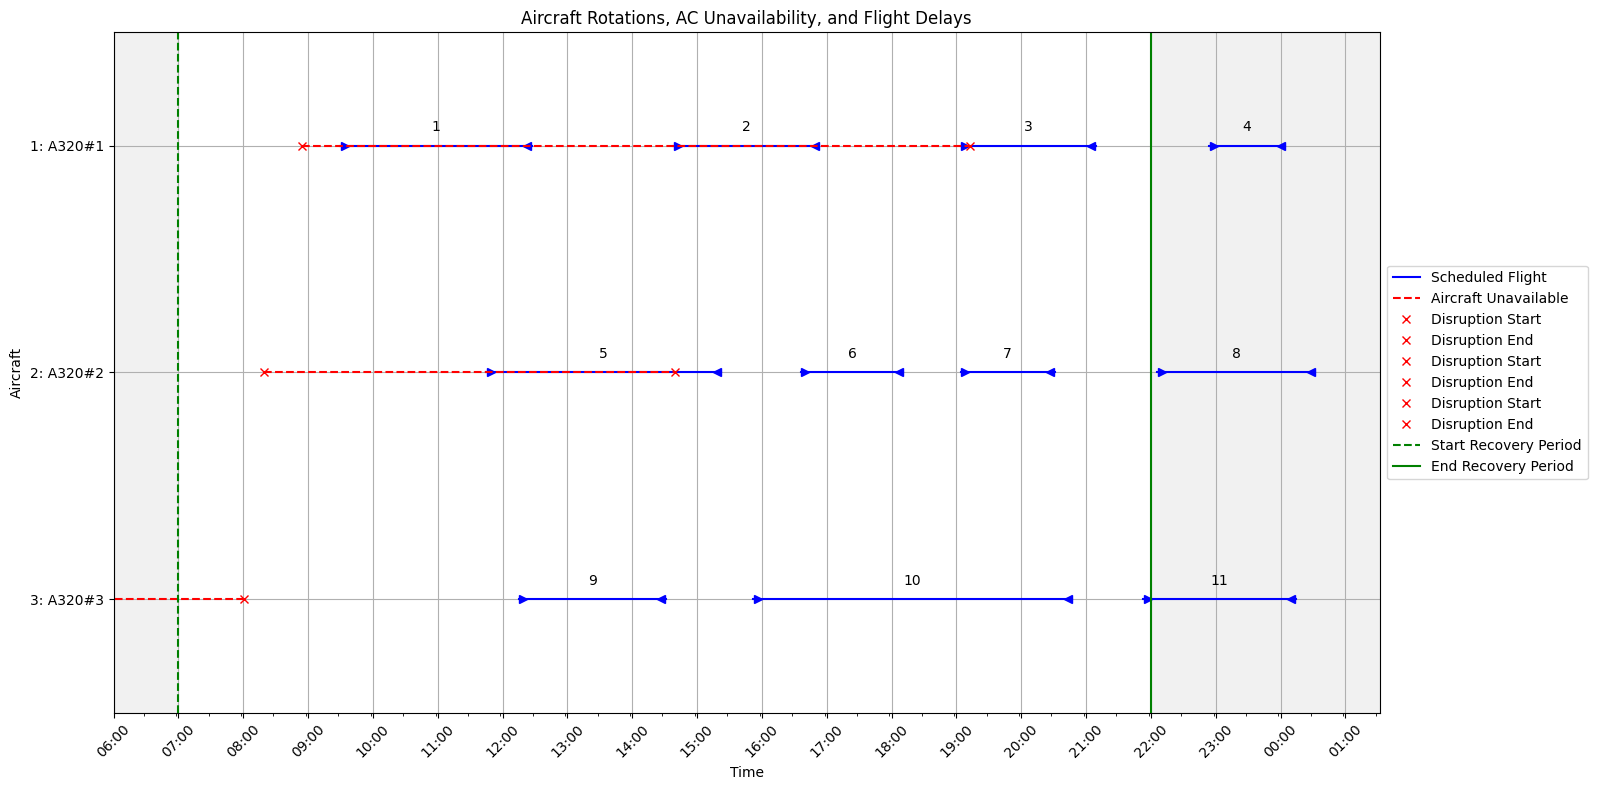

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_03


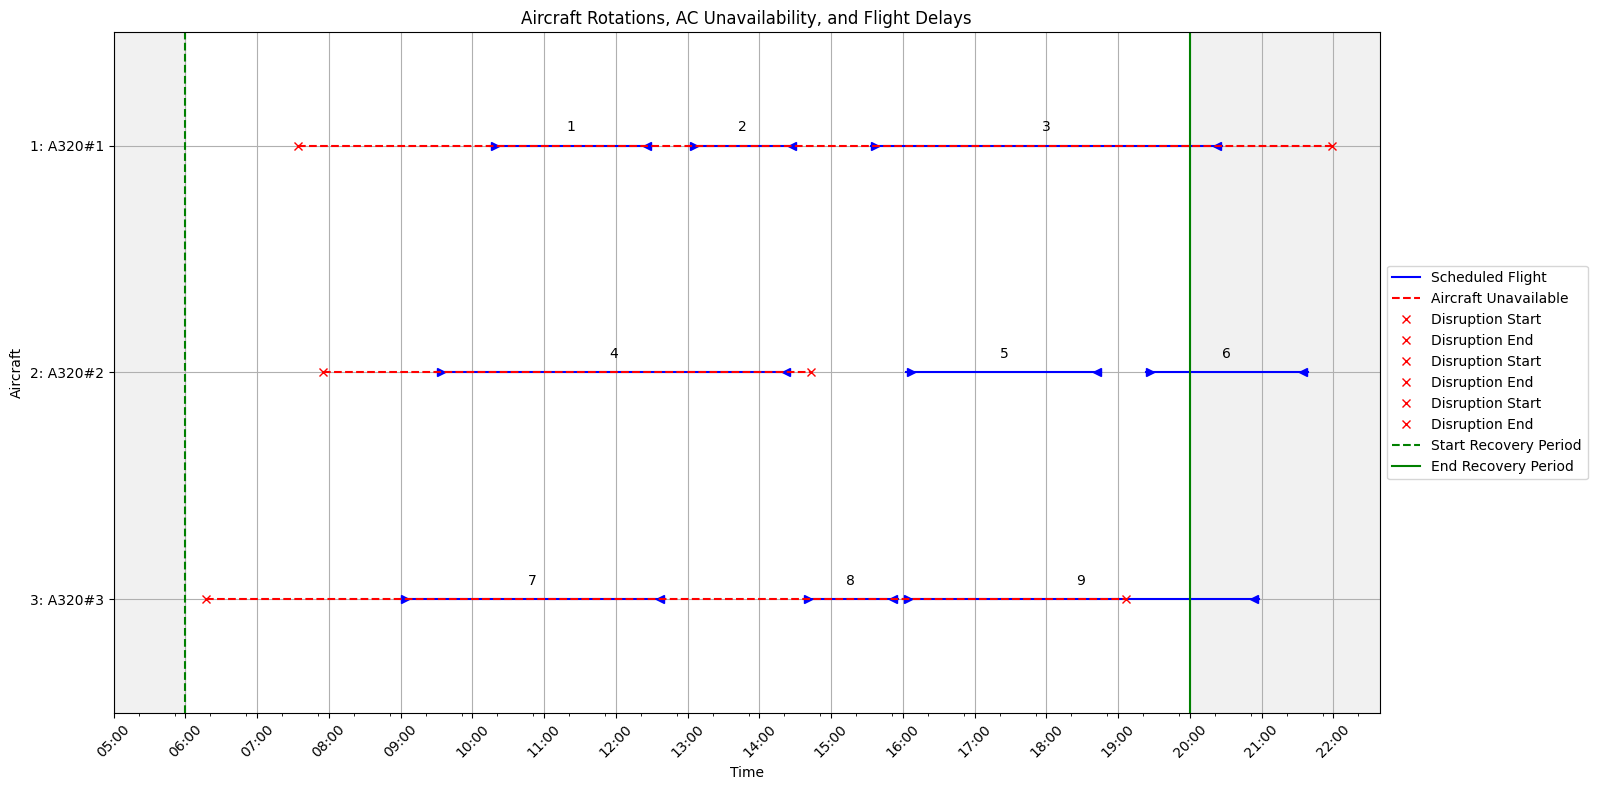

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_04


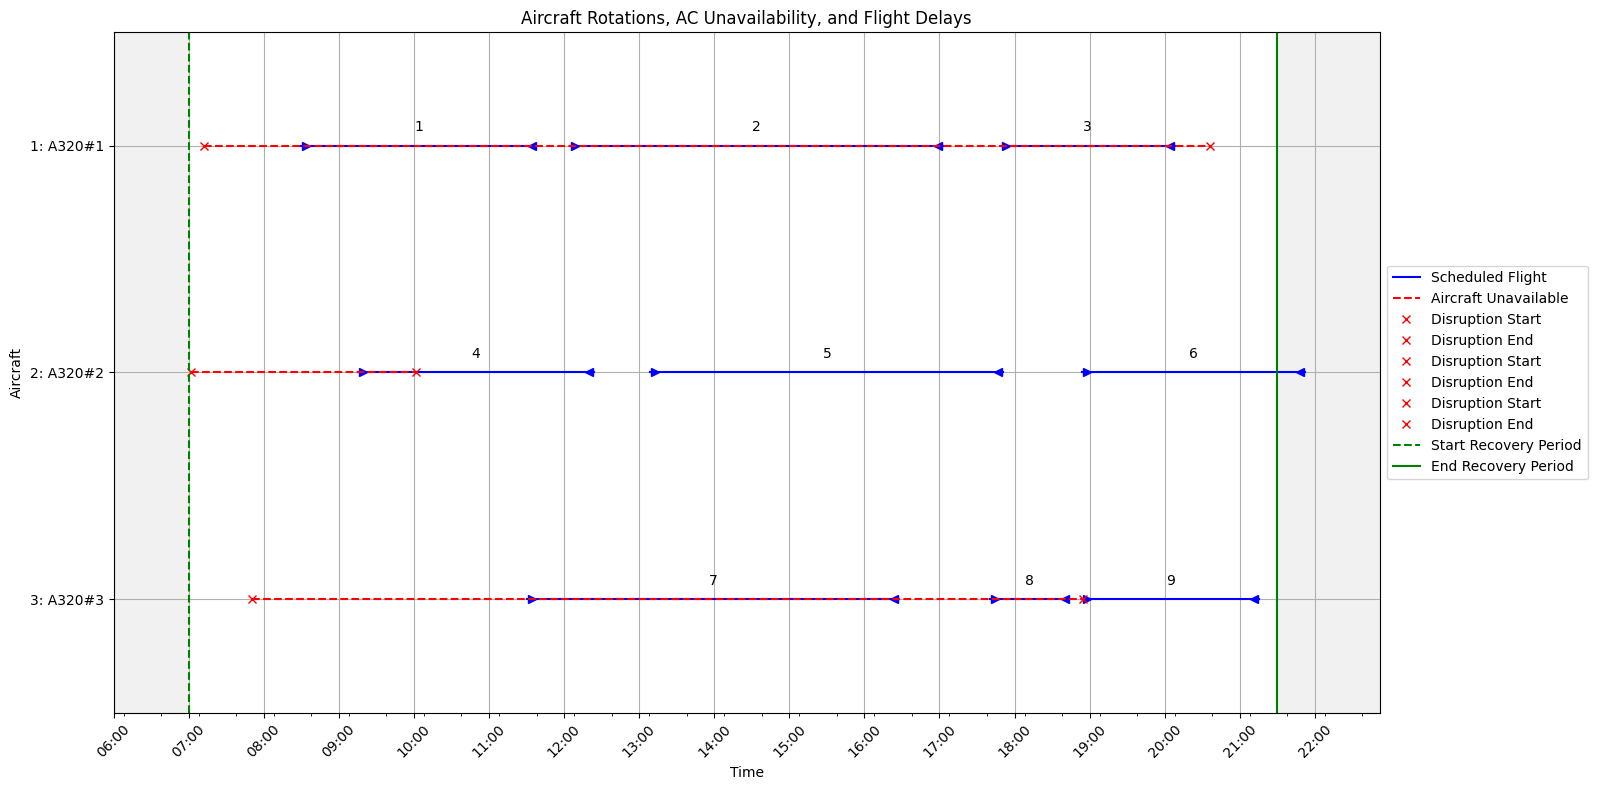

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_05


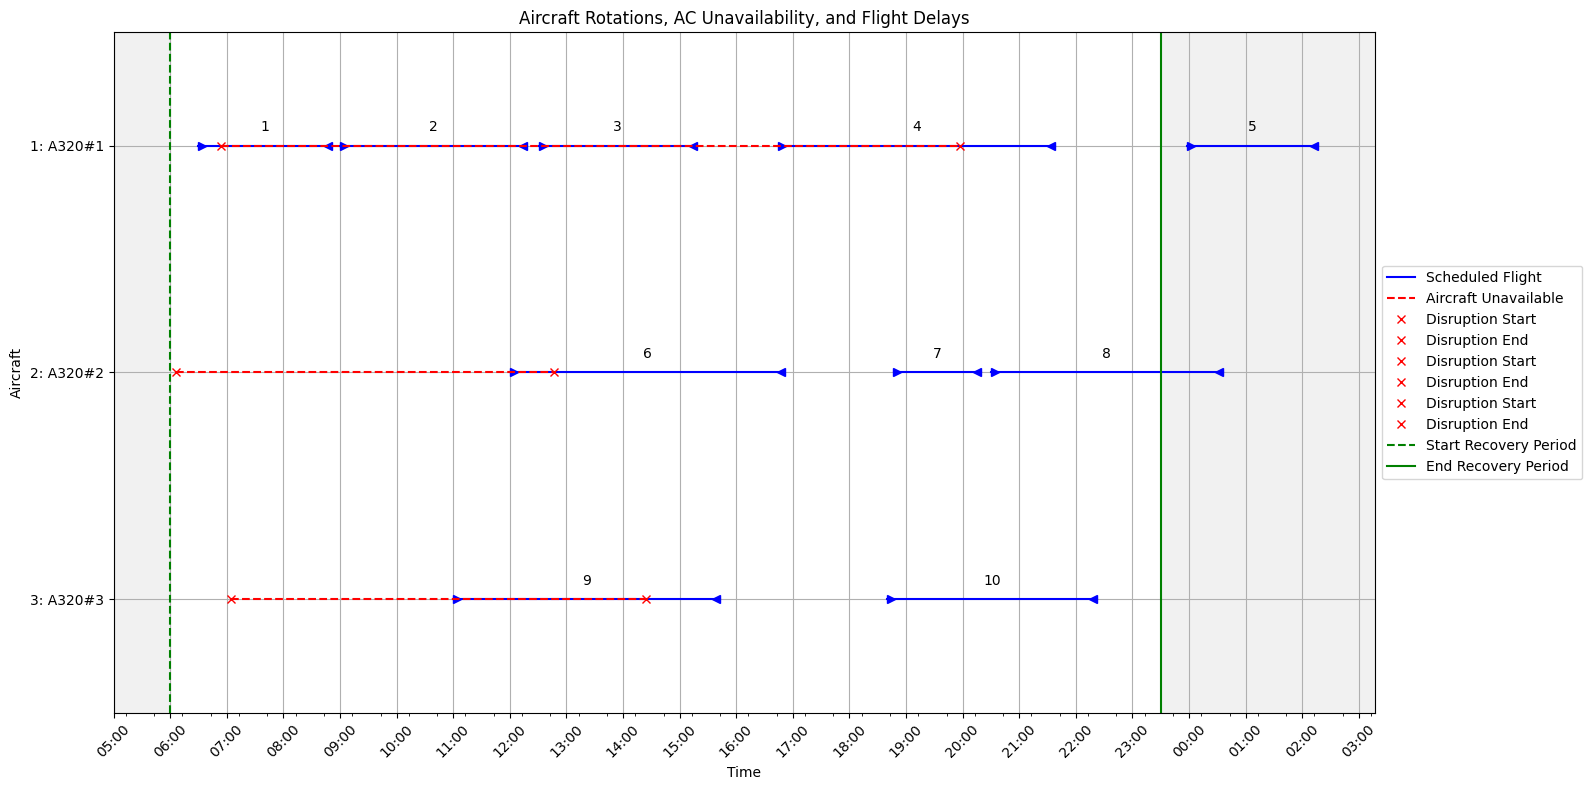

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_06


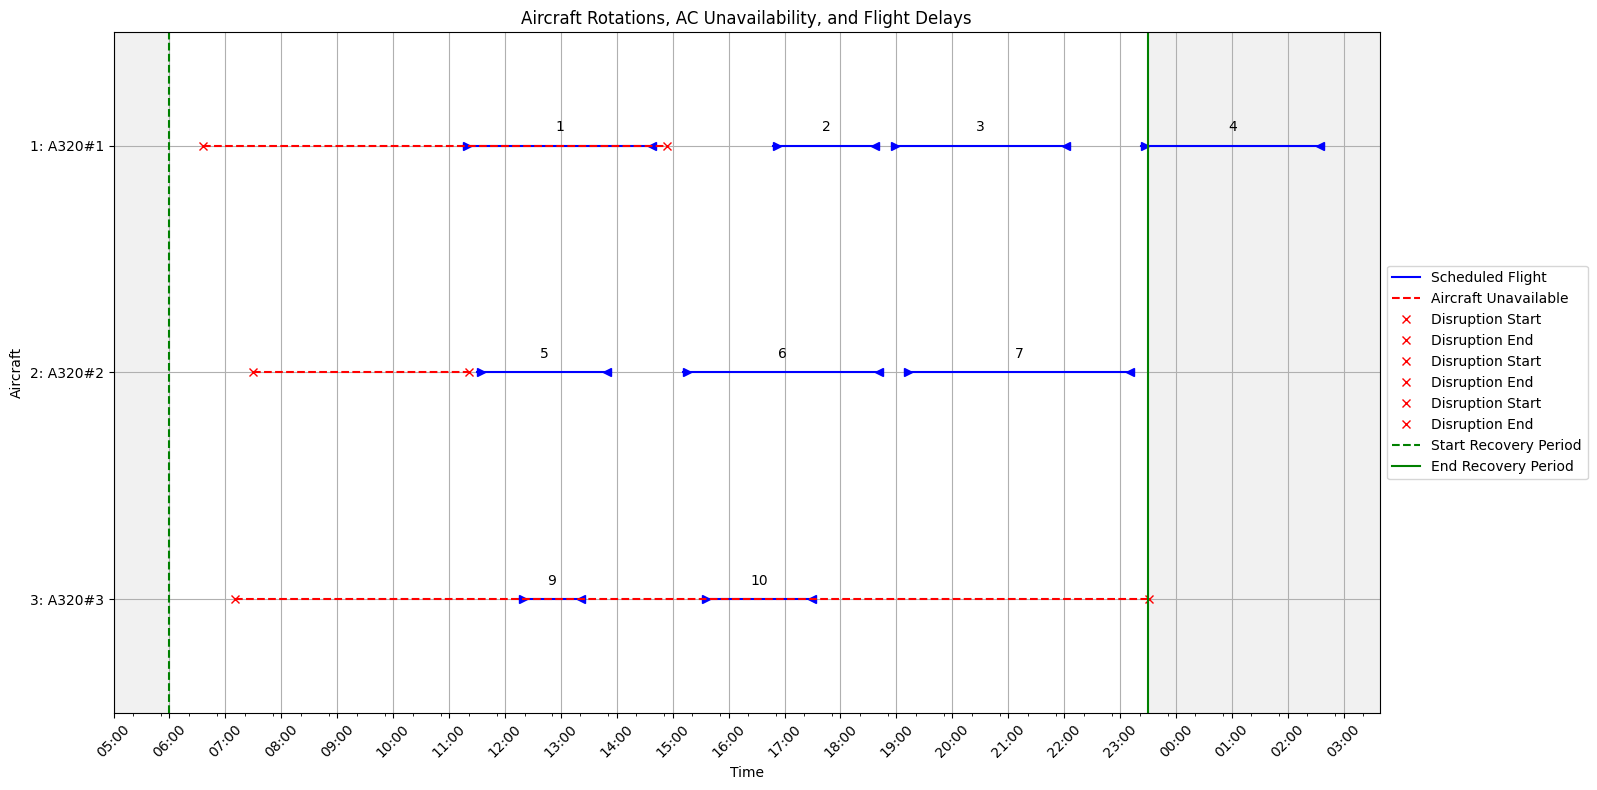

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_07


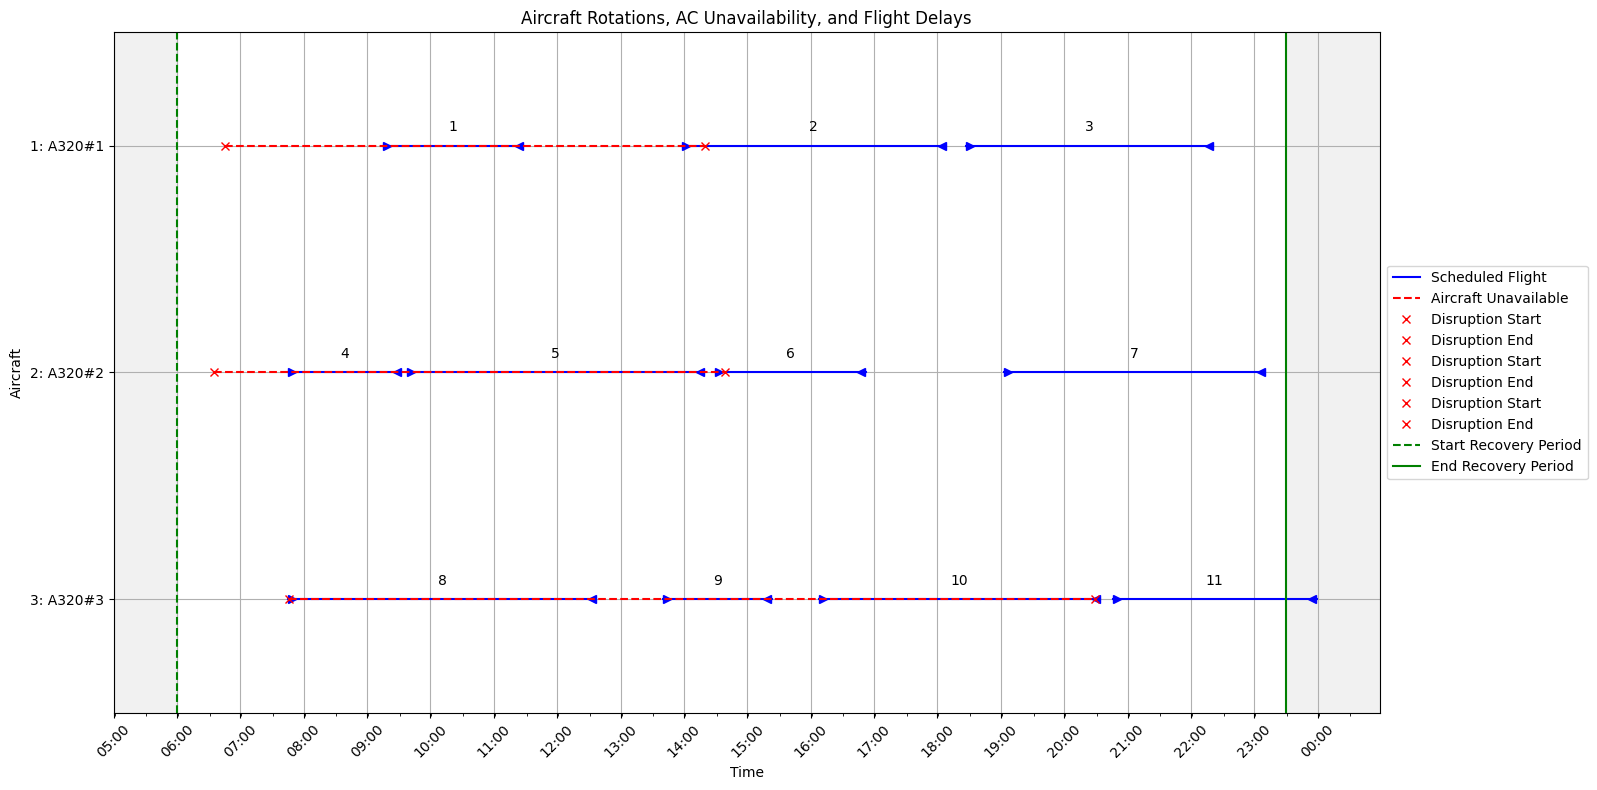

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_08


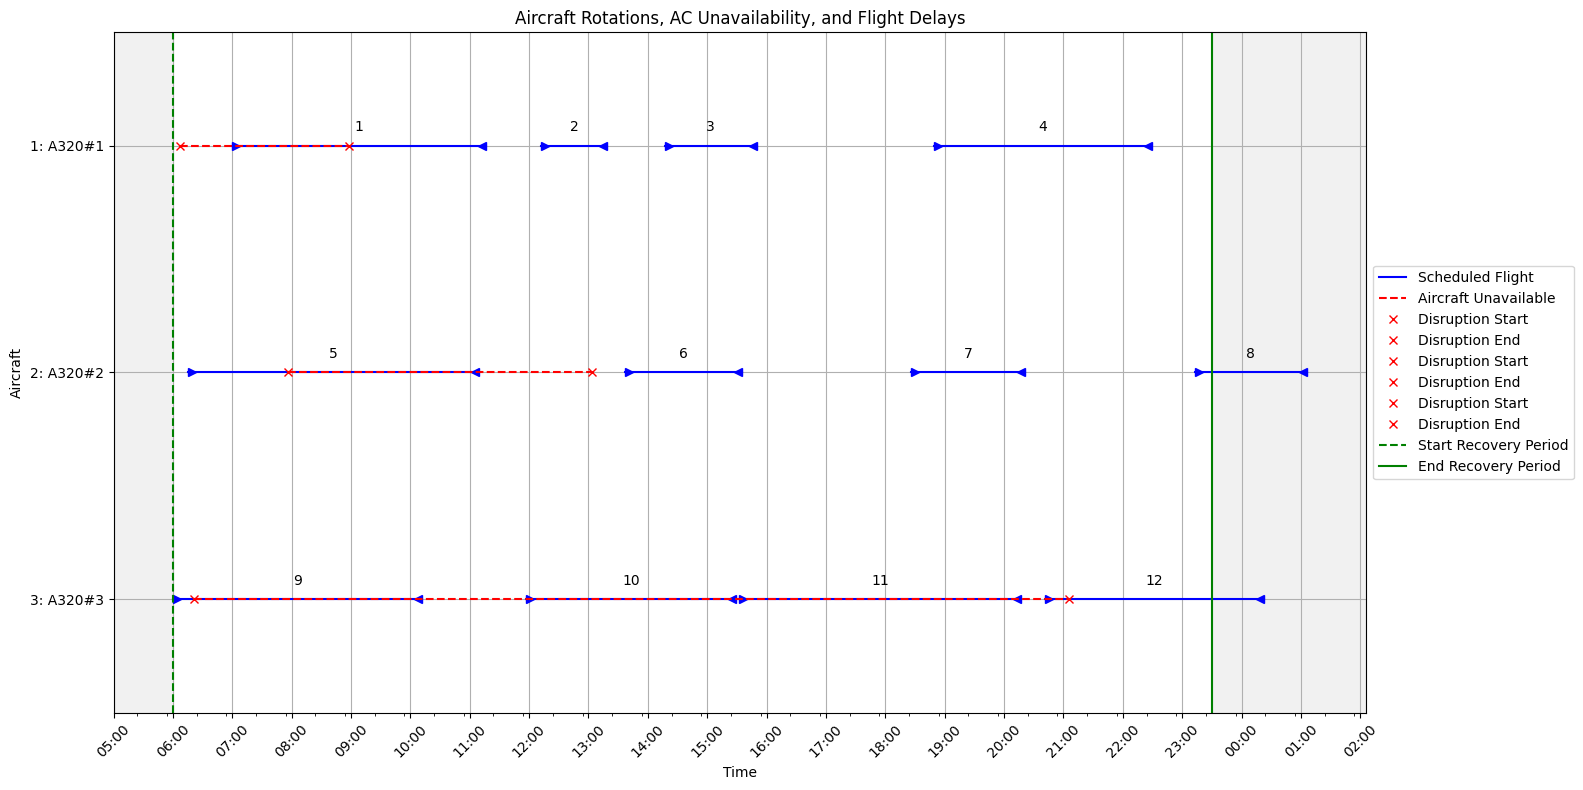

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_09


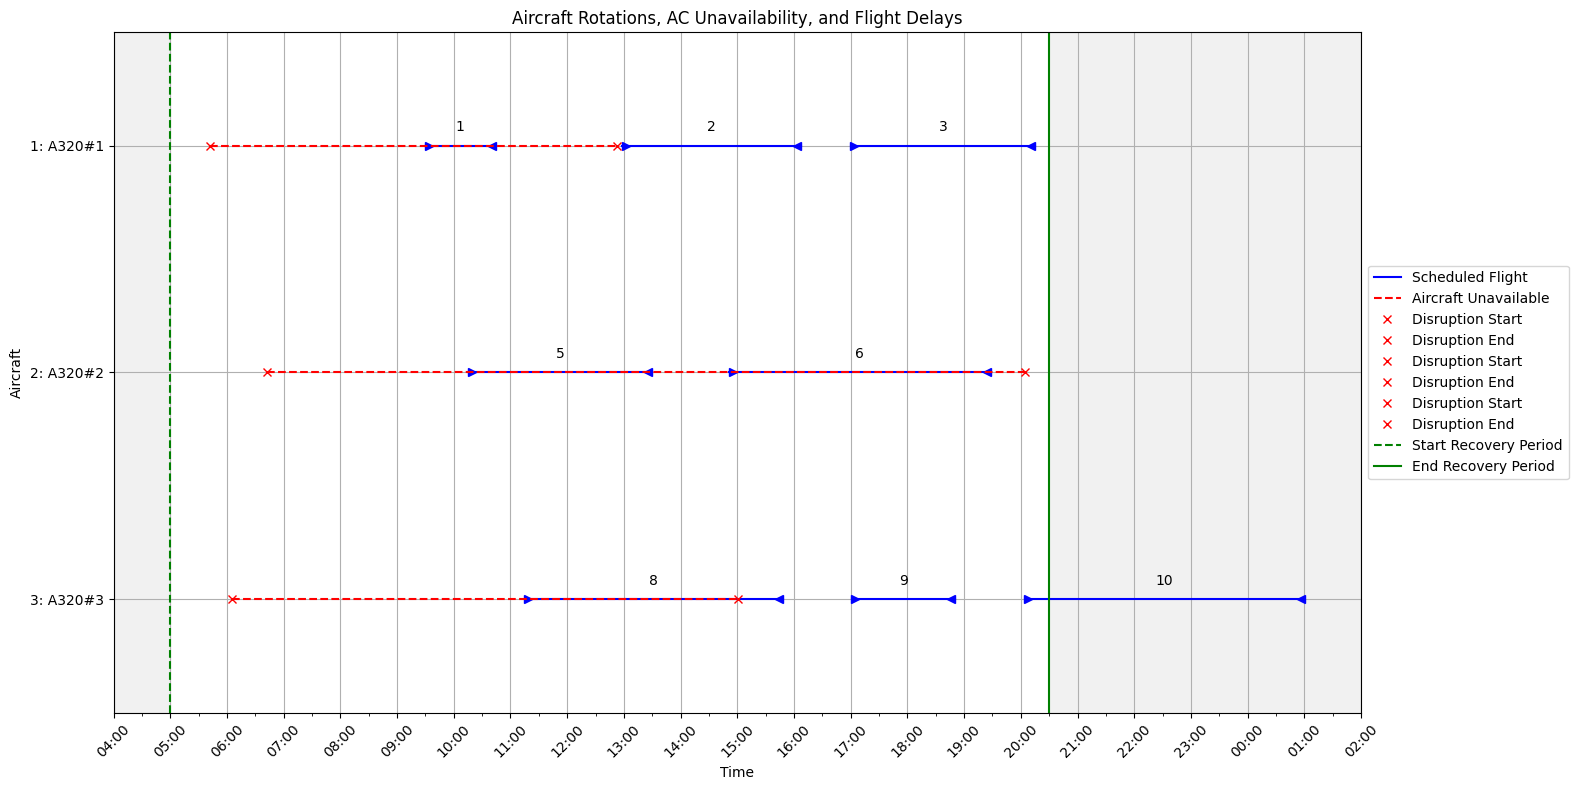

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_10


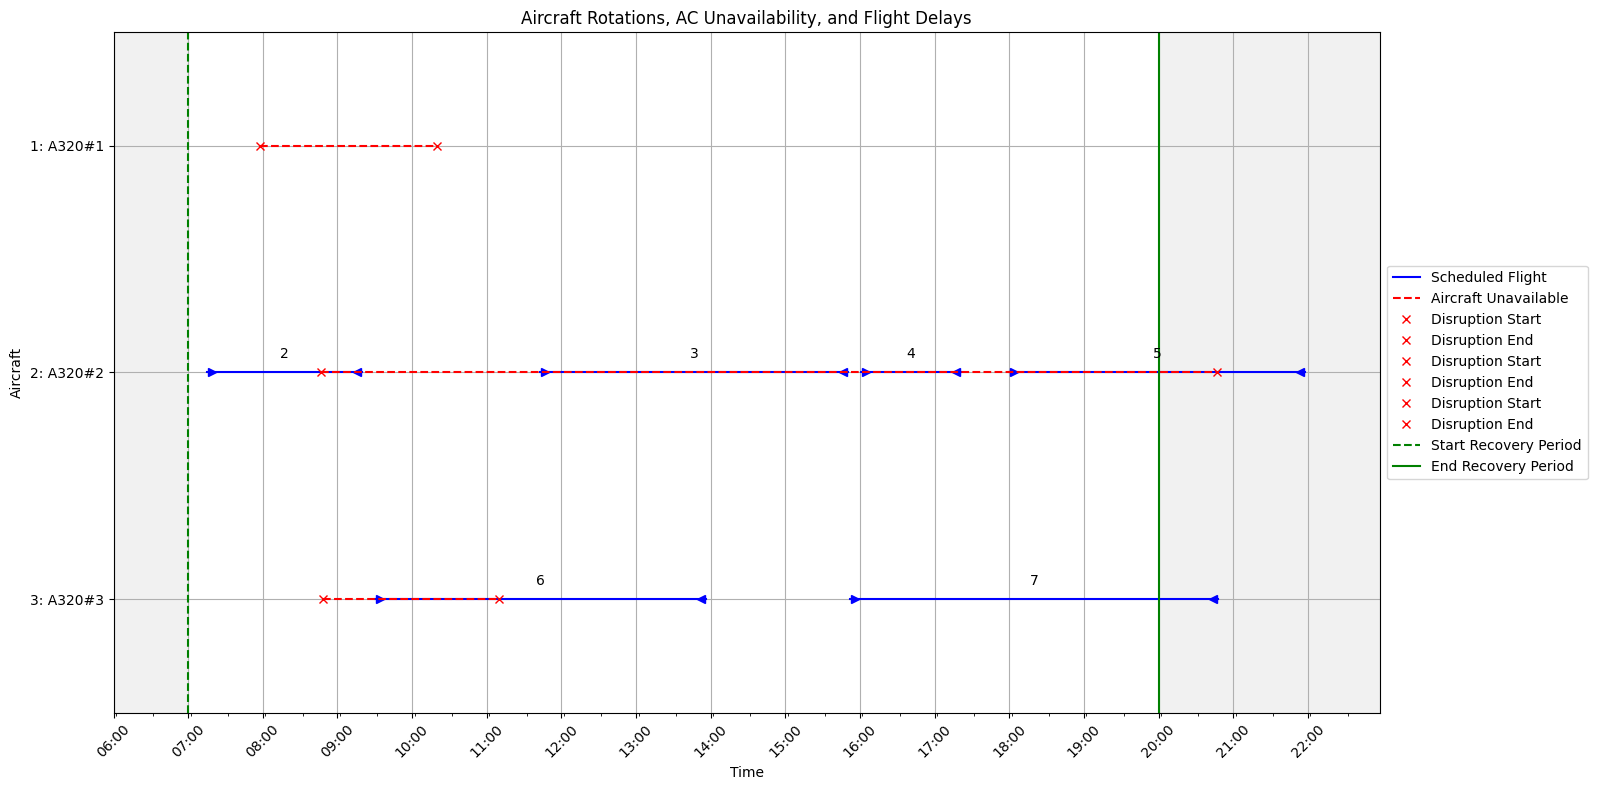

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_100


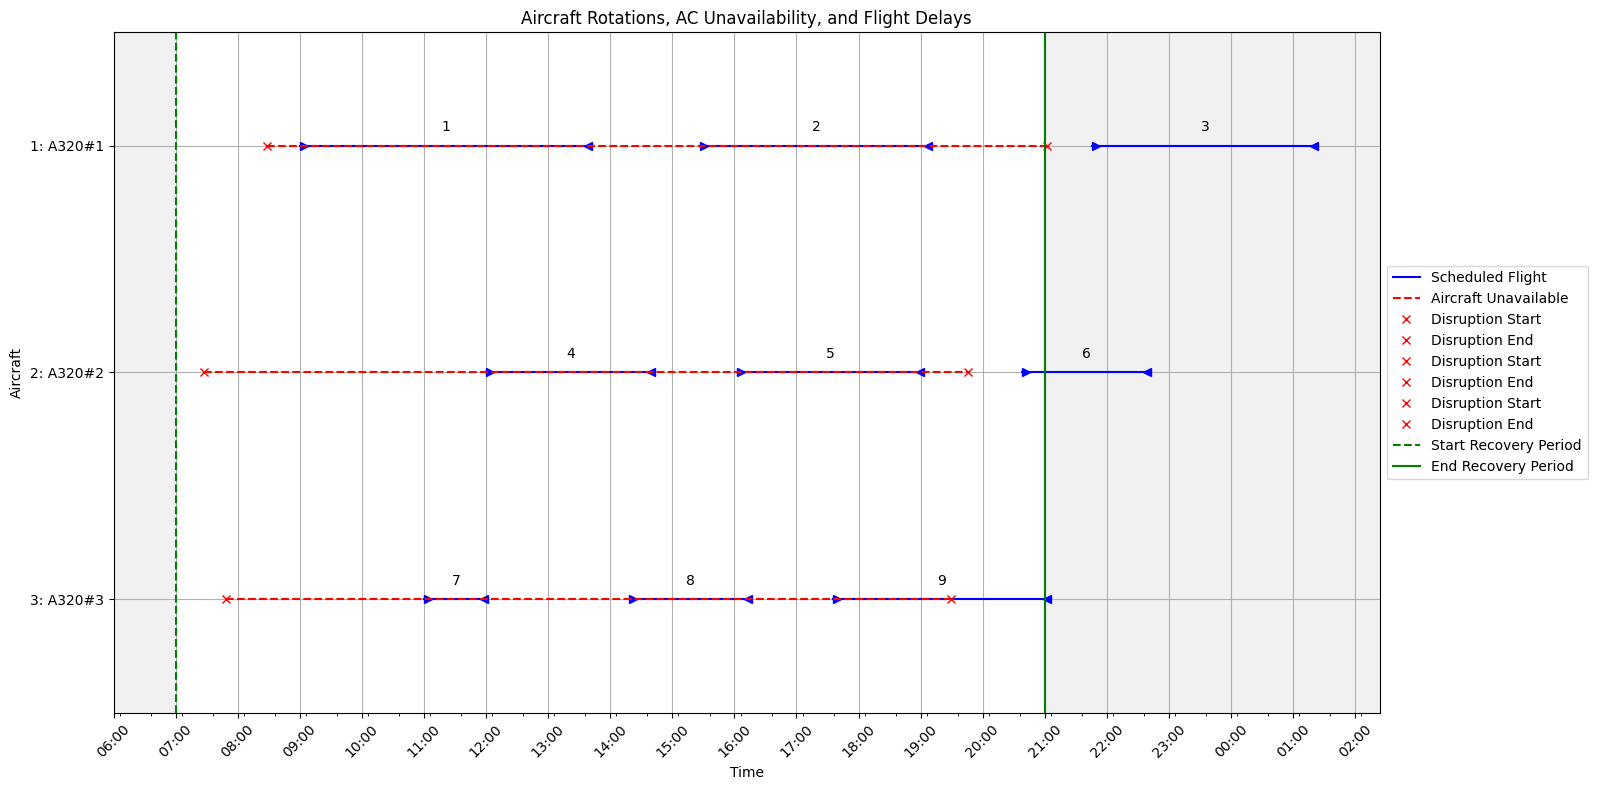

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_1000


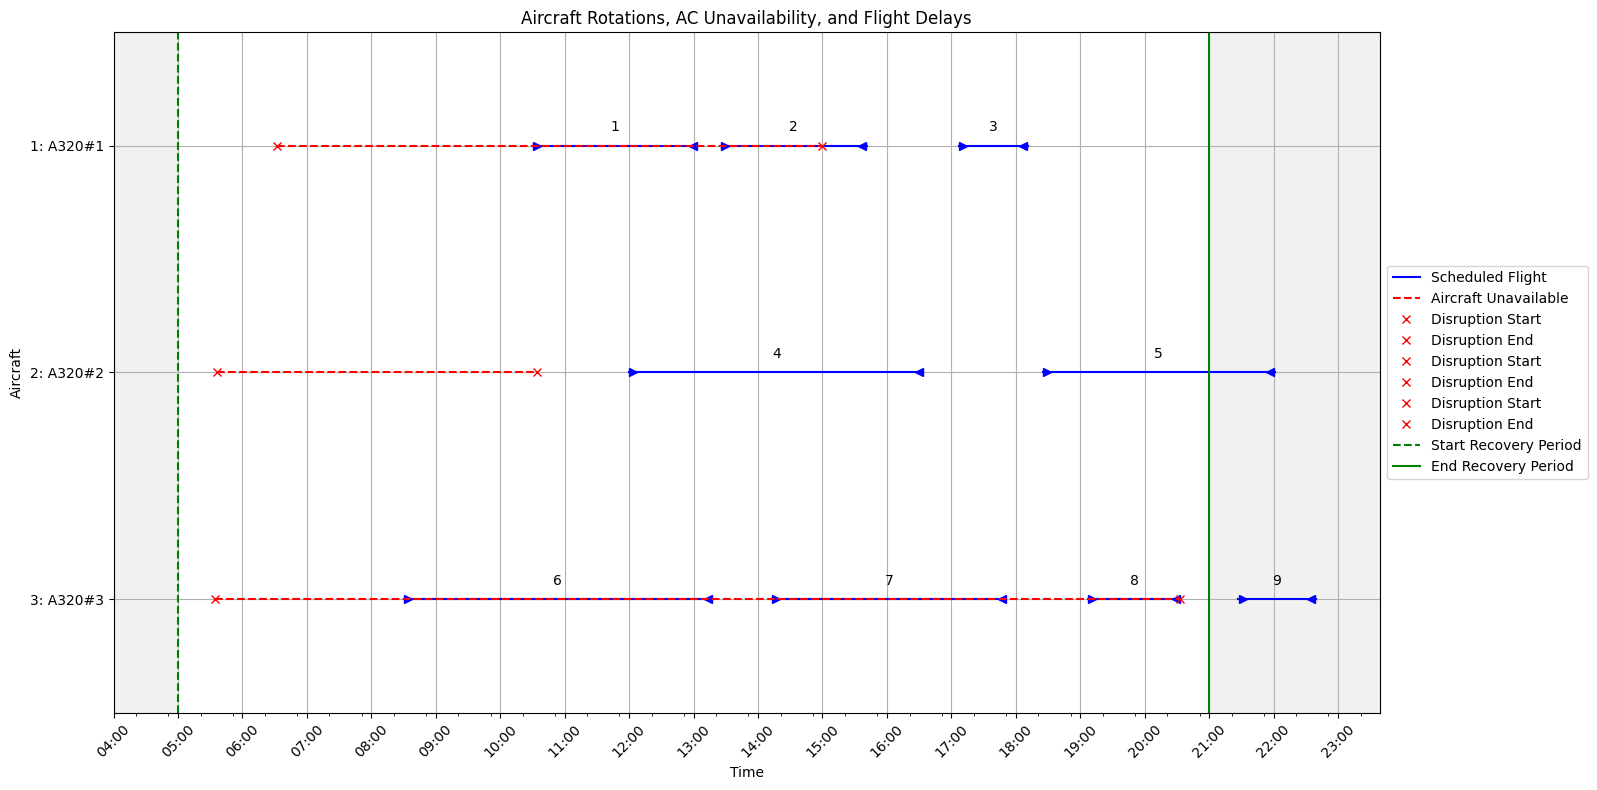

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_101


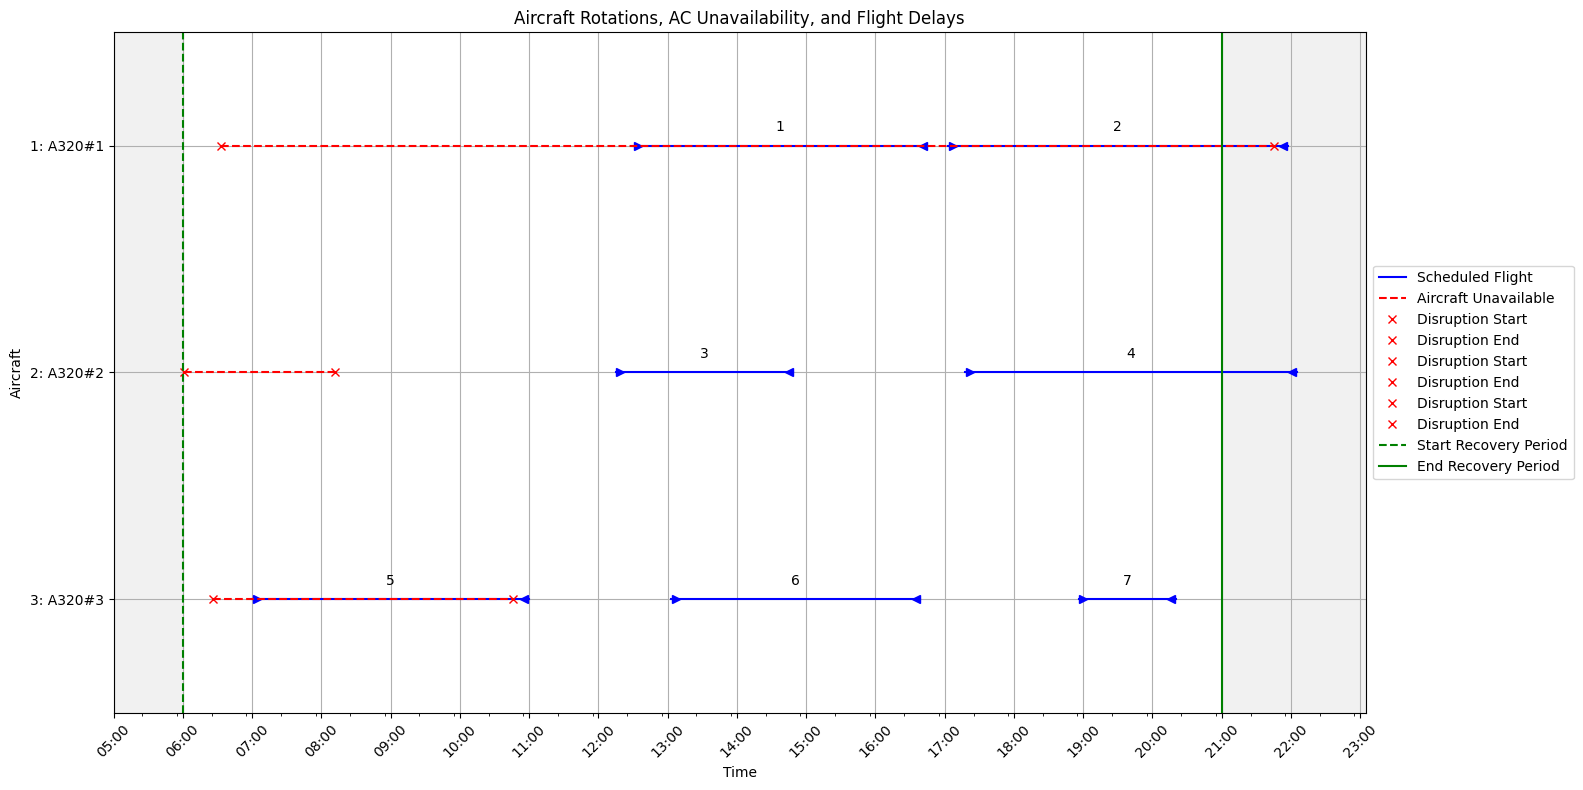

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_102


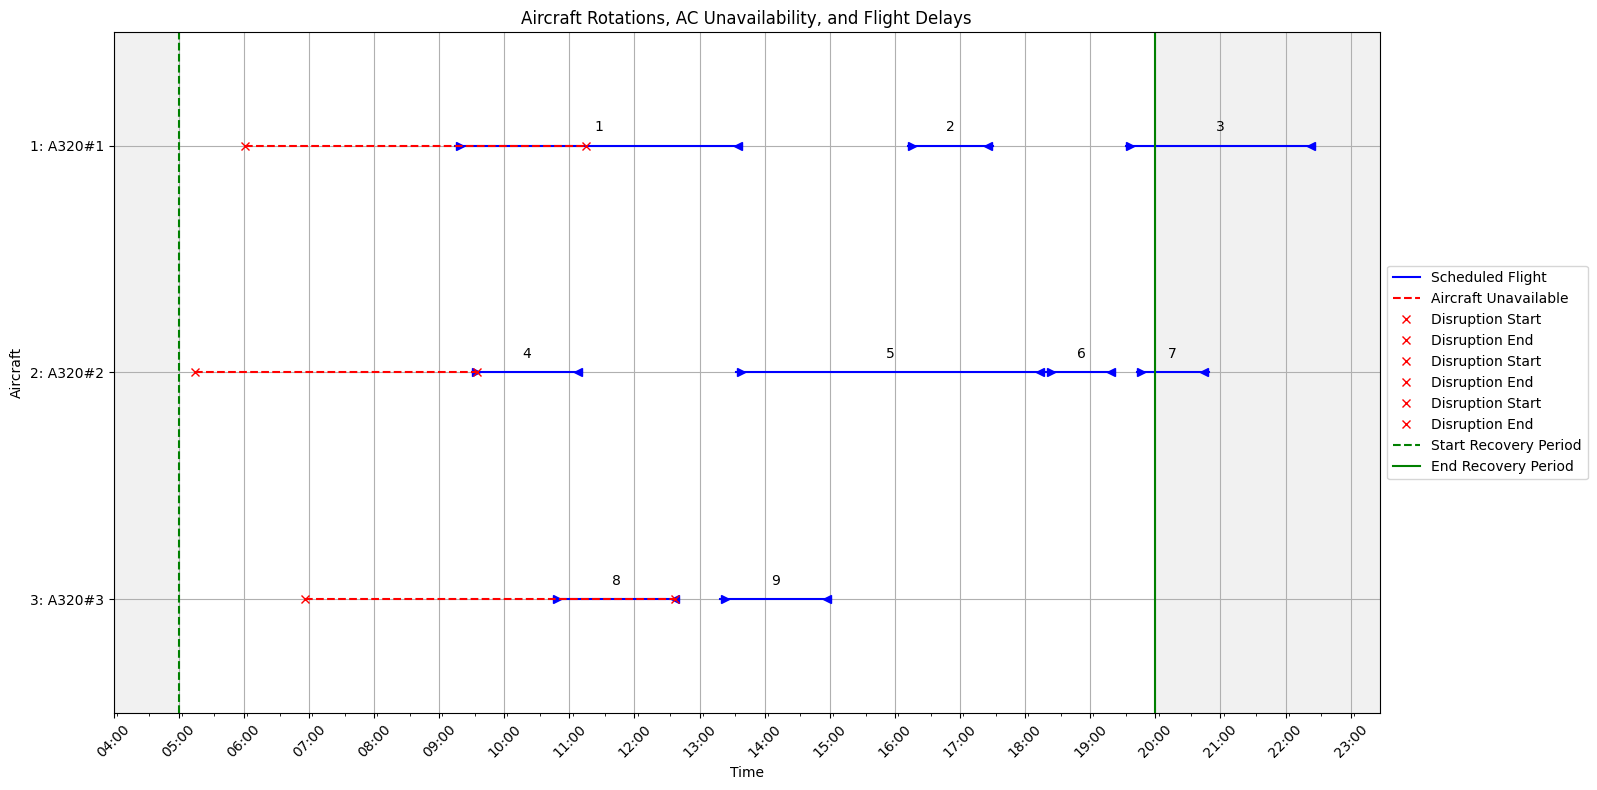

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_103


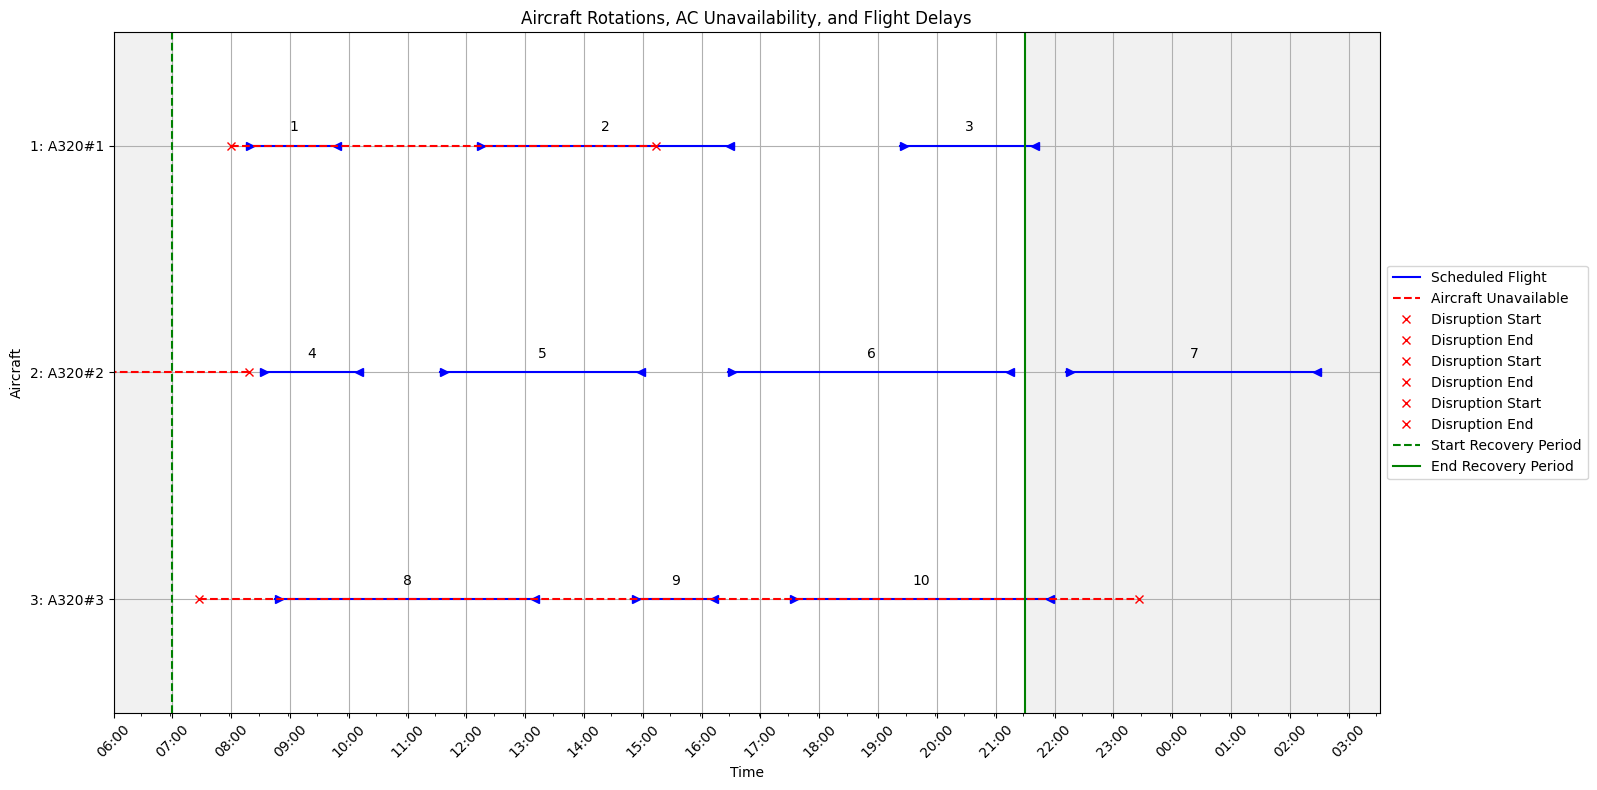

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_104


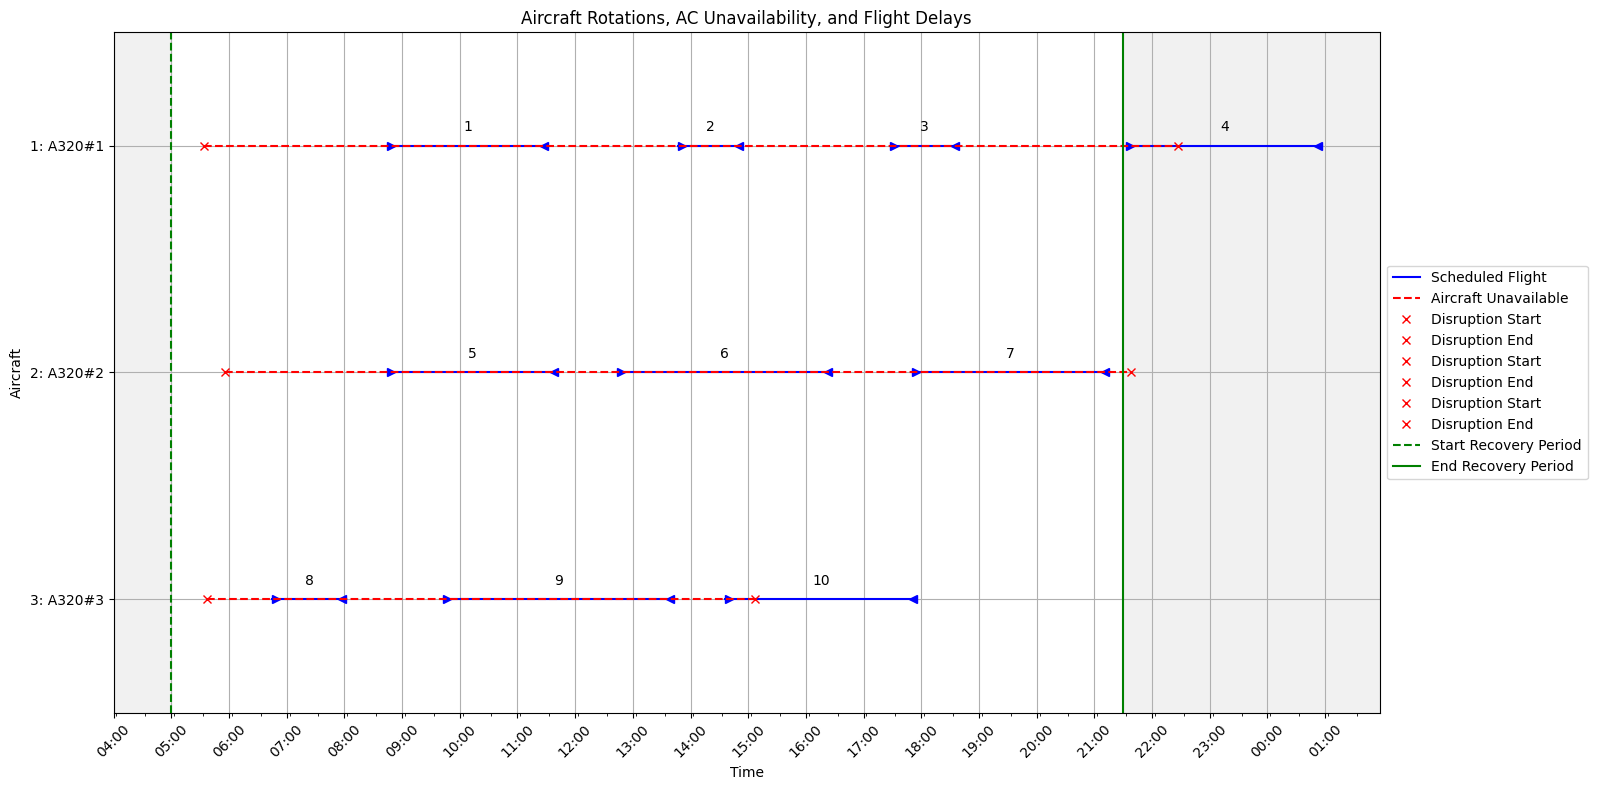

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_105


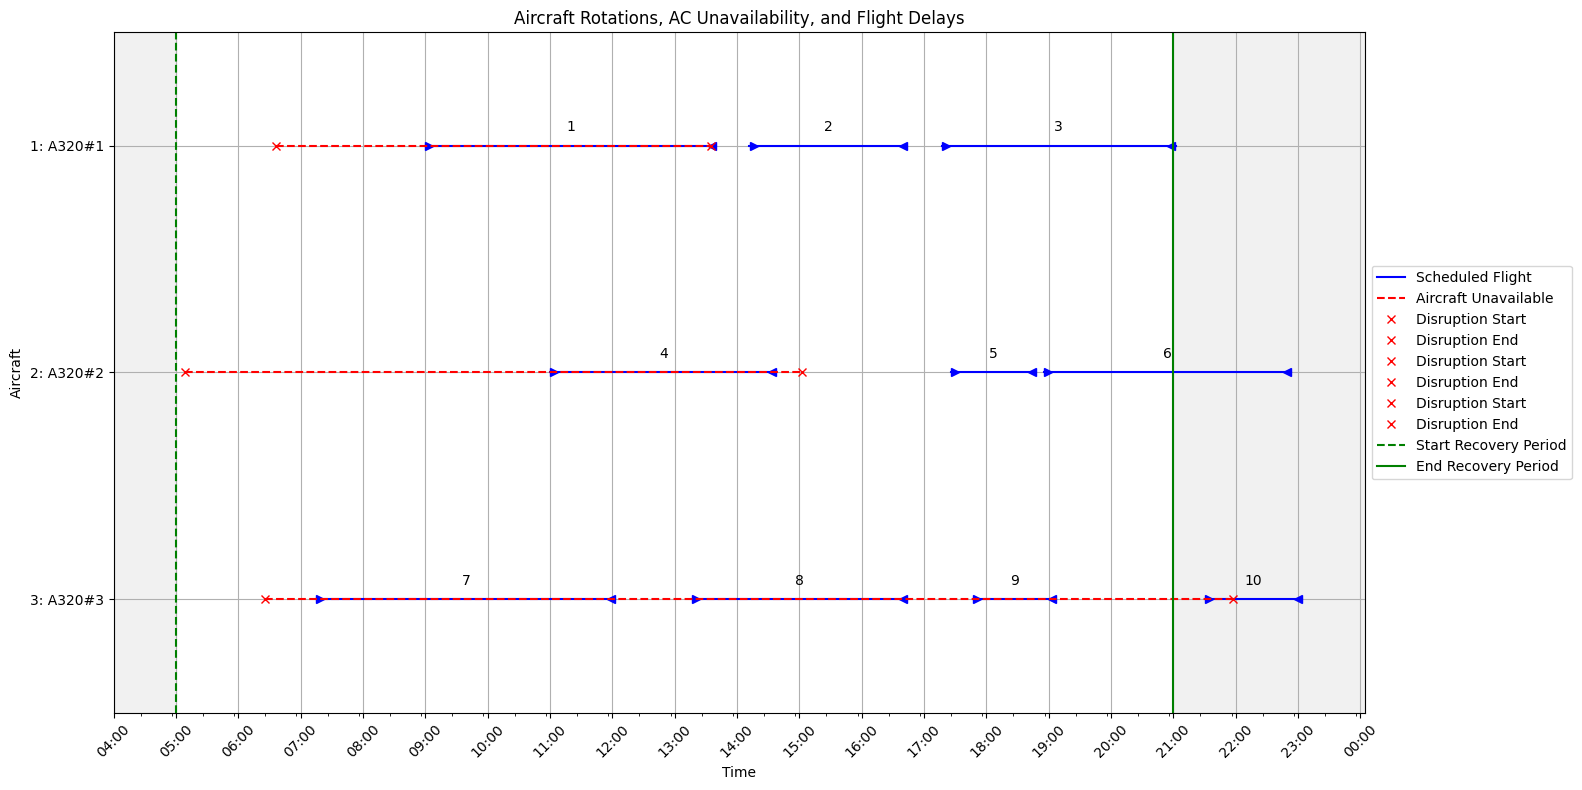

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_106


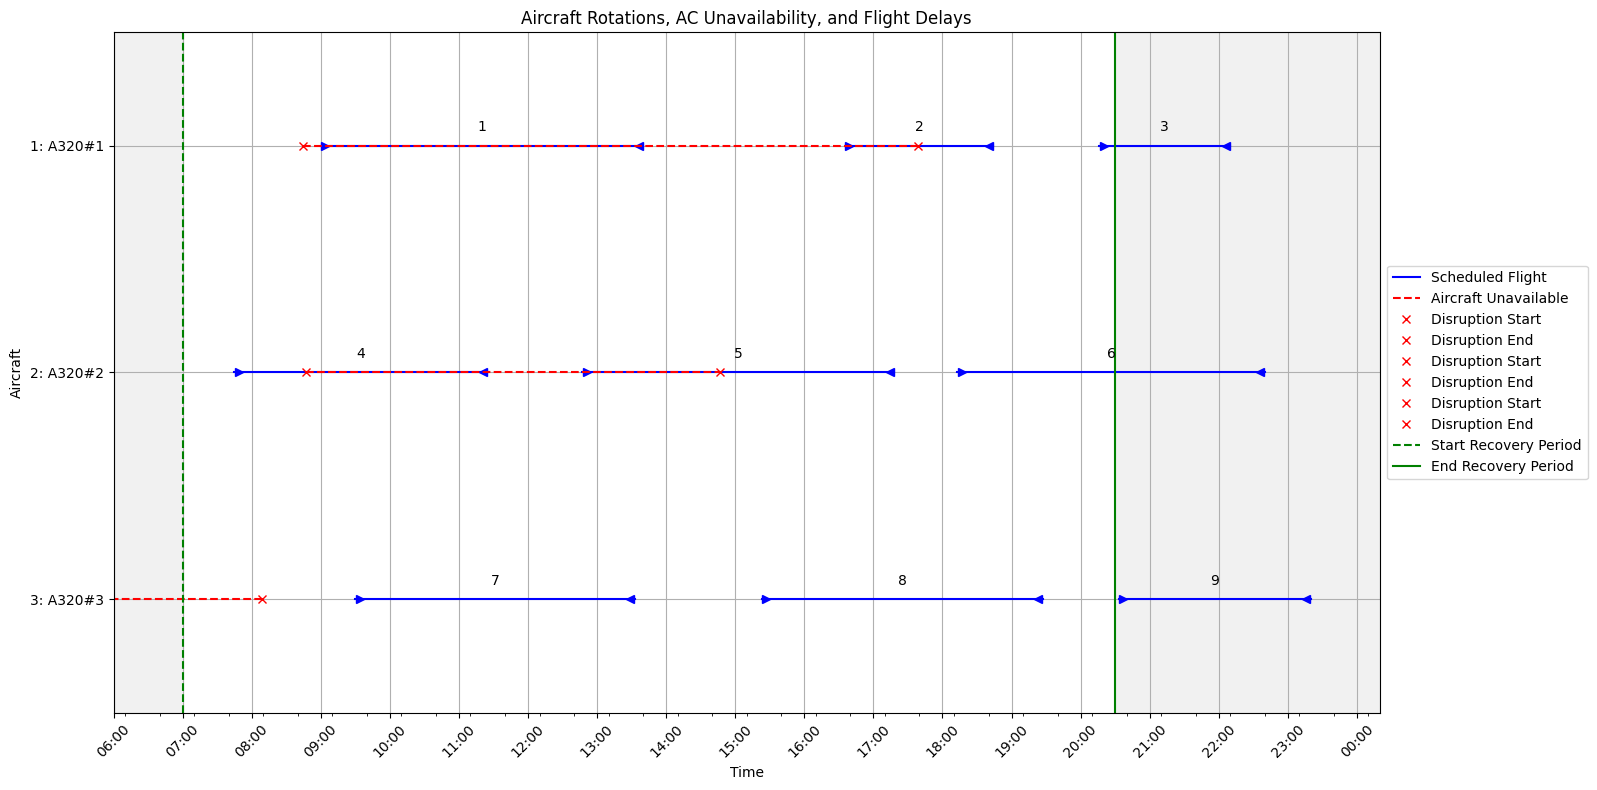

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_107


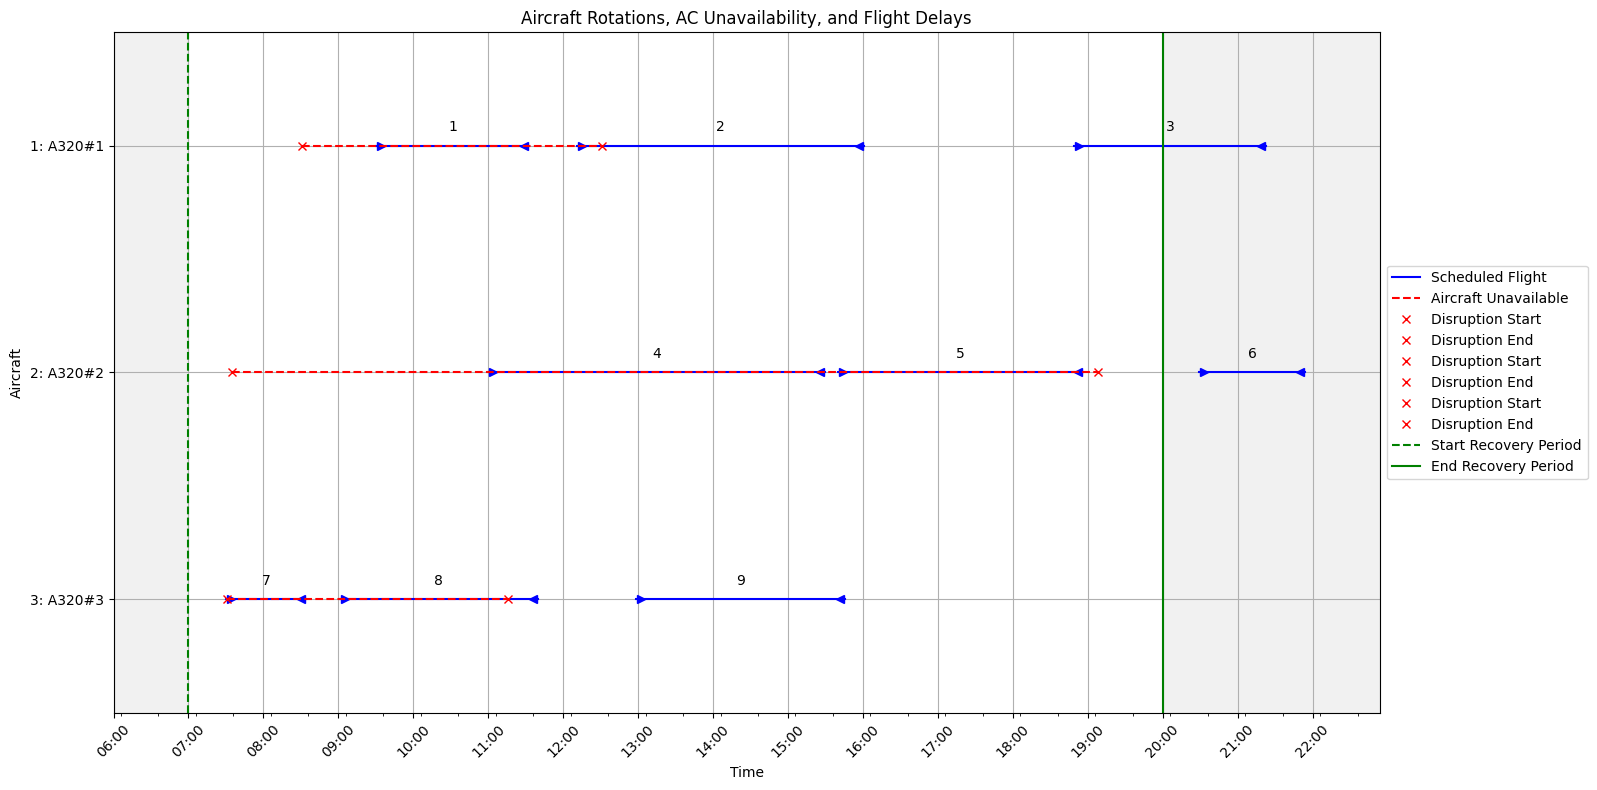

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_108


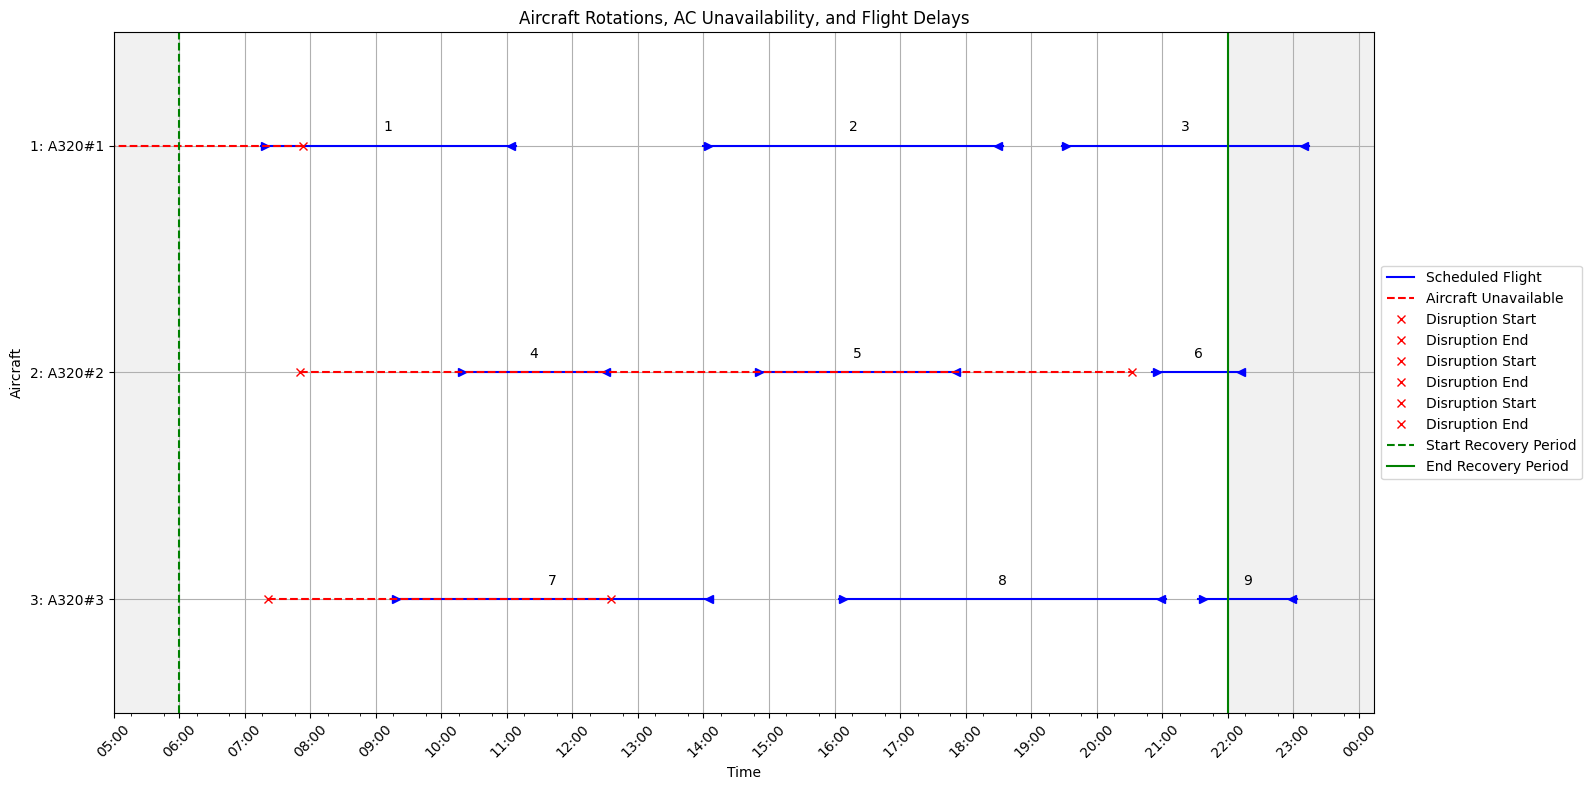

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_109


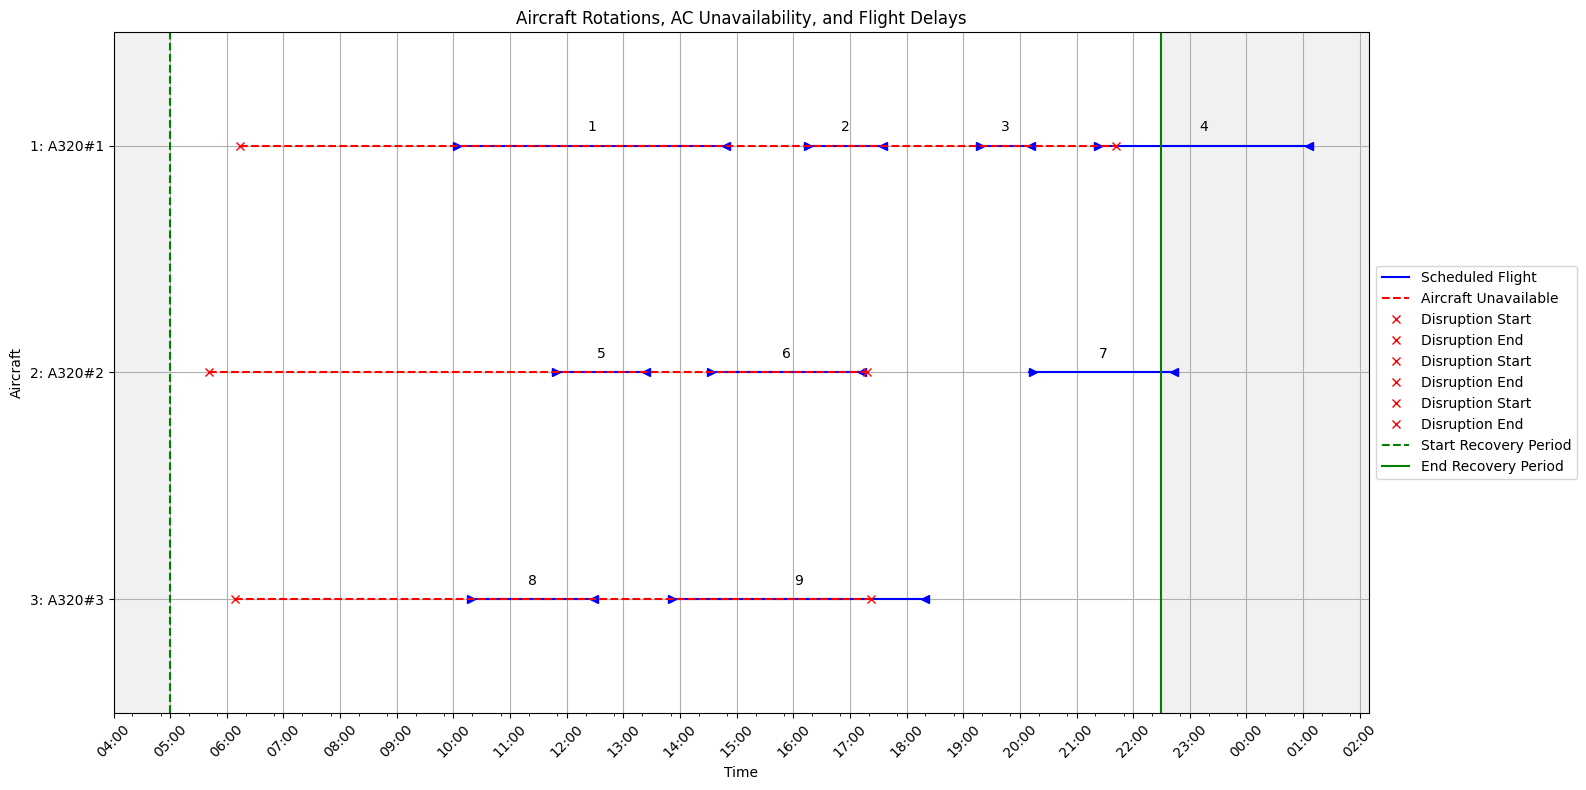

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_11


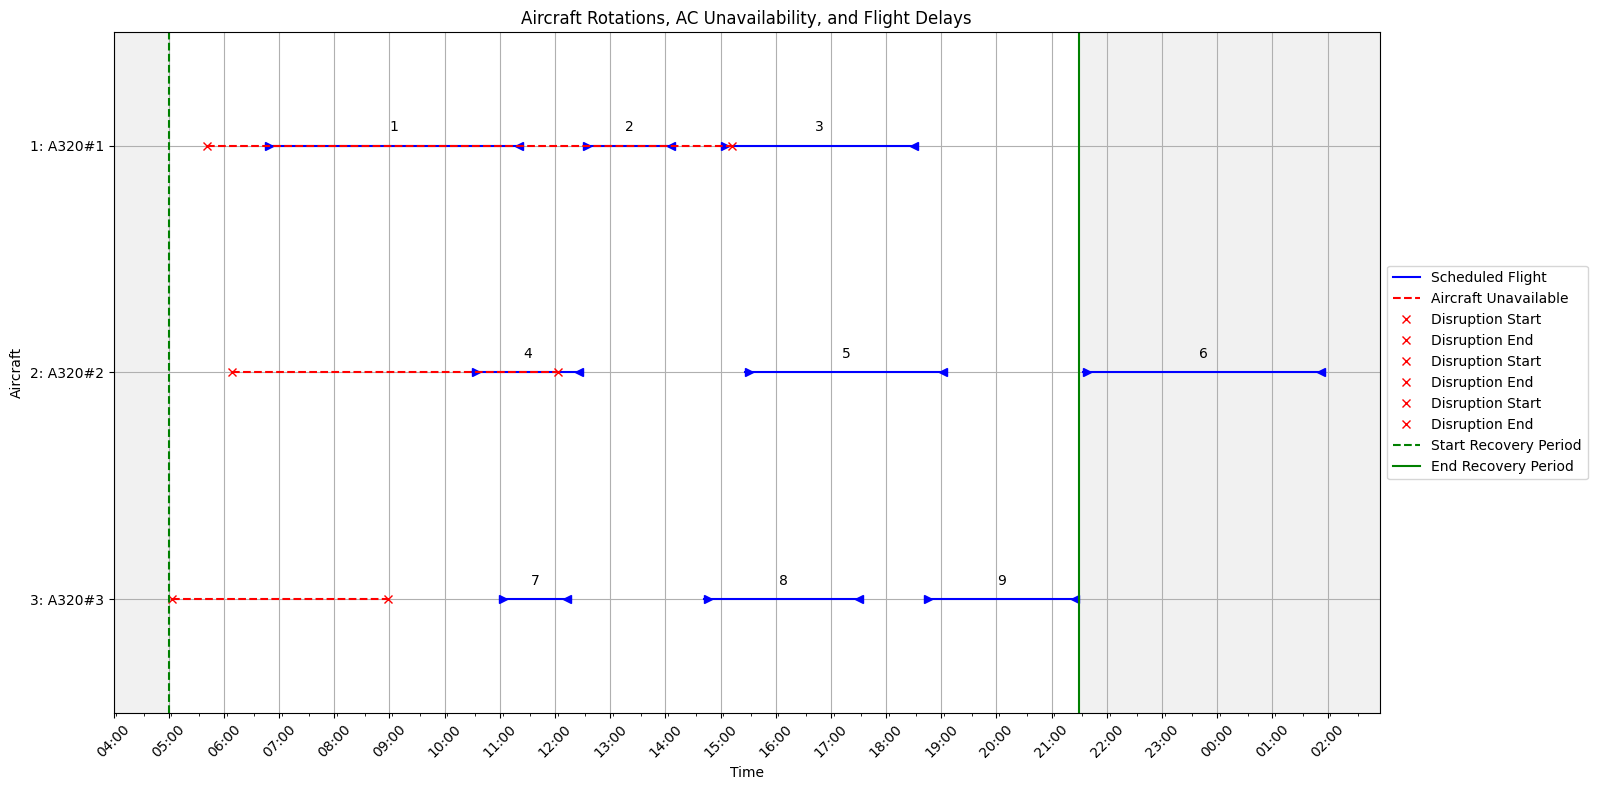

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_110


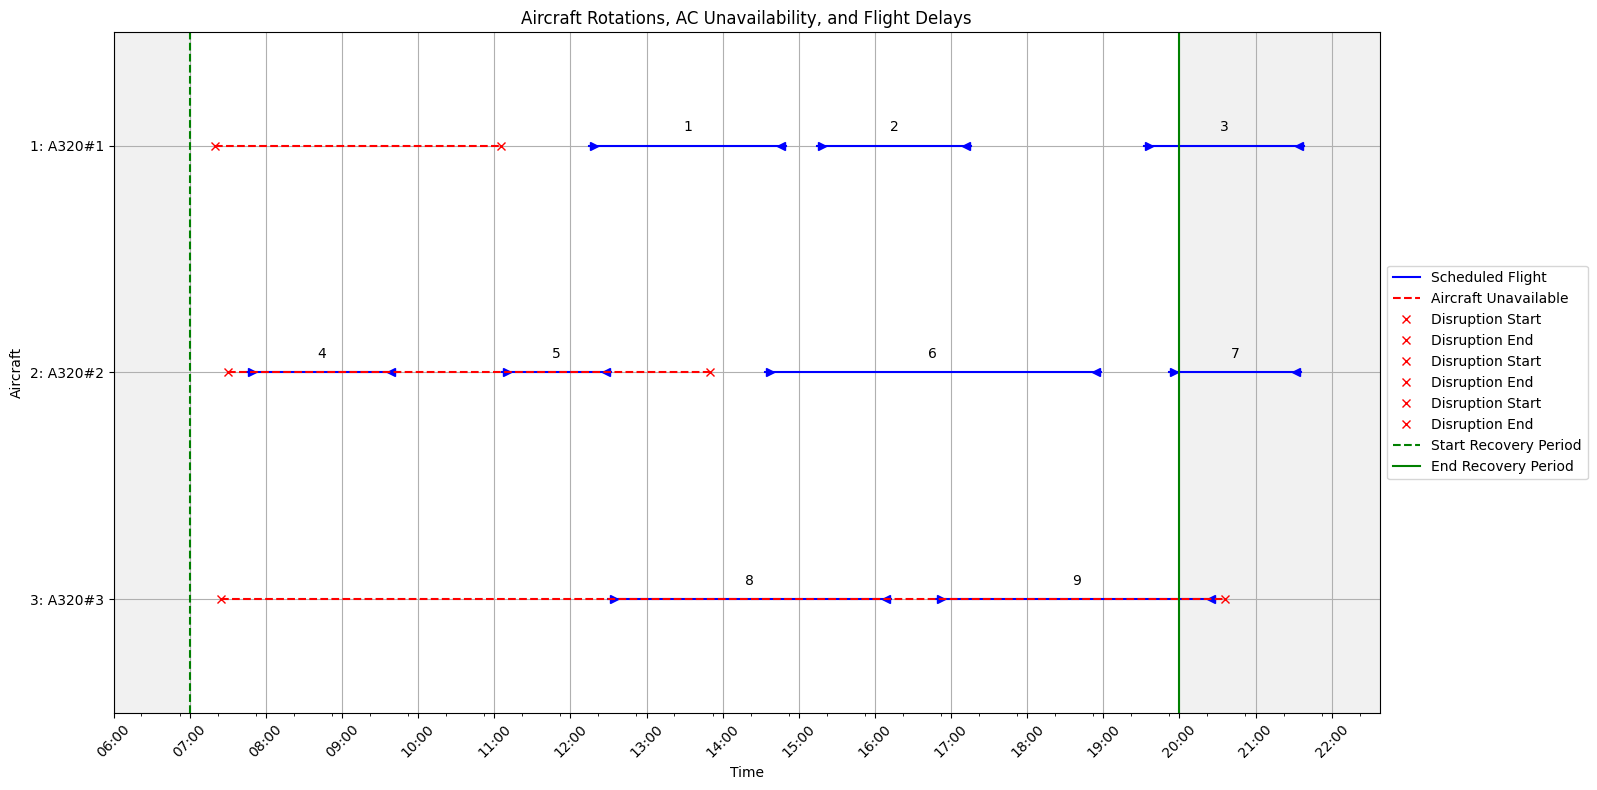

Aircraft Rotations for ../data/Testing/1k-3ac-12f-1dis-F/Scenario_111


KeyboardInterrupt: 

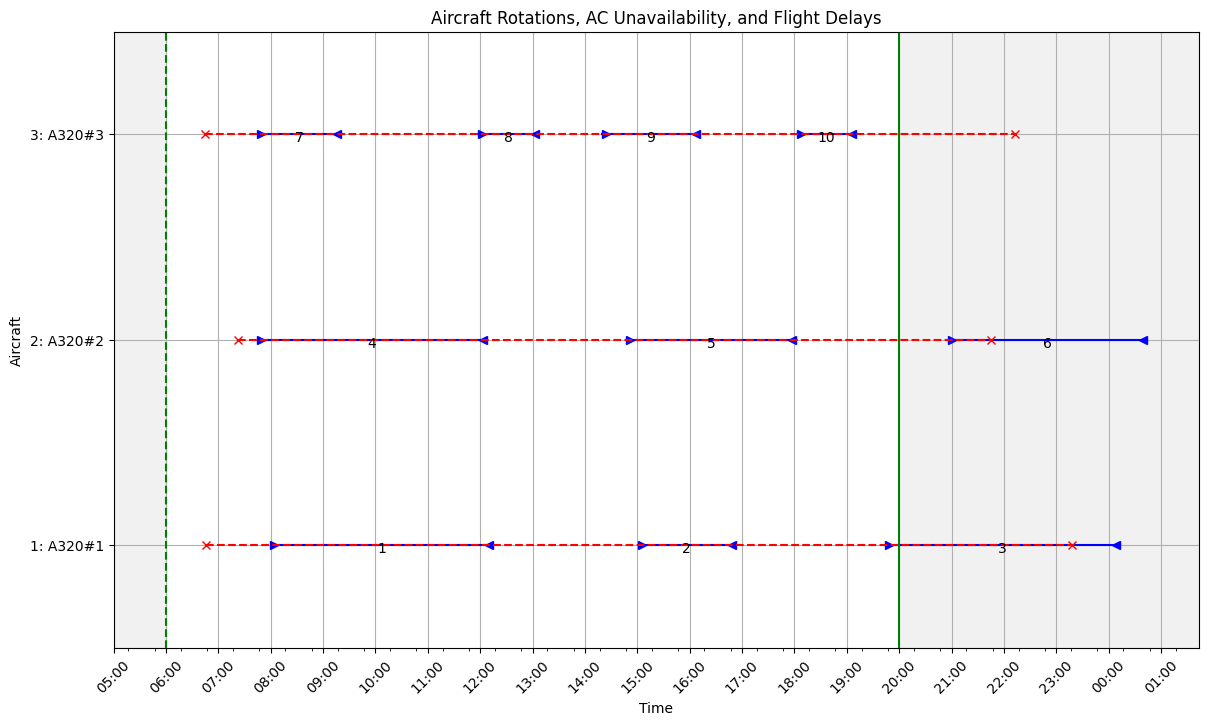

In [15]:
from scripts.visualizations import run_visualization
import os

# Set the scenario and root folder
data_root_folder = "../data/Testing/1k-3ac-12f-1dis-F/"


# Verify that the folder exists
if not os.path.exists(data_root_folder):
    raise FileNotFoundError('The folder does not exist at ', data_root_folder)

scenario_names = list(os.listdir(data_root_folder))
scenario_names.sort()

# Run the visualization for all scenarios
for scenario_name in scenario_names:
    if os.path.isdir(data_root_folder + scenario_name):
        run_visualization(scenario_name, data_root_folder, aircraft_rotations=True, airport_rotations=False)